# About Dataset:-
- This dataset is a collection of information related to customers and their credit card usage. It contains various features that provide insights into customer behavior, preferences, and credit card usage patterns.  
# Objectives:-

1.   To perform data cleaning, preprocessing, visualizing and feature engineering on the dataset.

2.   To implement hierarchical clustering, K-means clustering and BDSCAN models.





# 💭Features Description


1.   Sl_No : Column represents the serial number or index assigned to each record in the dataset.


2.   Customer Key : Column contains a unique identifier assigned to each customer in the dataset.


3.   Avg_Credit_Limit	: Column represents the average credit limit assigned to each customer, It indicates the average amount of credit that the customer is allowed to borrow or spend using their credit card.


4.  Total_Credit_Cards : Column denotes the total number of credit cards held by each customer.


5.   Total_visits_bank : Column represents the total number of visits made by each customer to a physical bank branch.


6.   Total_visits_online : Column denotes the total number of visits made by each customer to the online banking platform or website.


7.   Total_calls_made : column represents the total number of calls made by each customer to the customer service or support center of the credit card company.


## Importing and Loading Data

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes('colorblind')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings  #Remove unnecessary warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") 

In [174]:
data = pd.read_csv('D:\\prep\\resume\\ccfd\\Segmentation\\Credit Card Customer Data.csv', index_col='Sl_No')

data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


## EDA

### Drop unwanted Columns

In [143]:
data.drop(['Customer Key'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


### Duplicate Remove

In [145]:
dup = data.groupby('Customer Key').count()

duplicate_keys = dup.loc[dup['Total_calls_made'] >= 2].index

print('There are', len(duplicate_keys), 'duplicate entries for Customer Key')

for k in duplicate_keys:
    display(data.loc[data['Customer Key'] == k])

data_cleaned = data[~data['Customer Key'].isin(duplicate_keys)]

display('Cleaned data :' , data_cleaned)


There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


'Cleaned data :'

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
6,58634,20000,3,0,1,8
...,...,...,...,...,...,...
656,51108,99000,10,1,10,0
657,60732,84000,10,1,13,2
658,53834,145000,8,1,9,1


### New Features

In [175]:
data['Credit_Utilization_Ratio'] = data['Avg_Credit_Limit'] / data['Total_Credit_Cards']


In [176]:
data['Interaction_Score'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']

In [177]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
Sl_No,,,,,,,,
1,87073,100000,2,1,1,0,50000.000000,2
2,38414,50000,3,0,10,9,16666.666667,19
3,17341,50000,7,1,3,4,7142.857143,8
4,40496,30000,5,1,1,4,6000.000000,6
5,47437,100000,6,0,12,3,16666.666667,15


### Explore  using Visuals

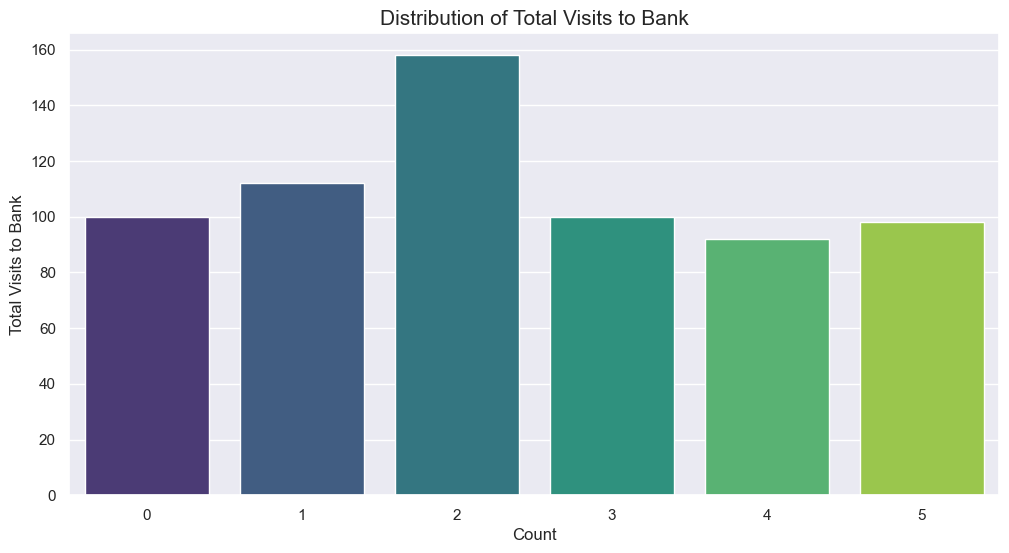

In [178]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=data, x='Total_visits_bank', ax=ax, palette='viridis')

ax.set_title('Distribution of Total Visits to Bank', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Total Visits to Bank', fontsize=12)

plt.show()

In [179]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made','Credit_Utilization_Ratio','Interaction_Score']

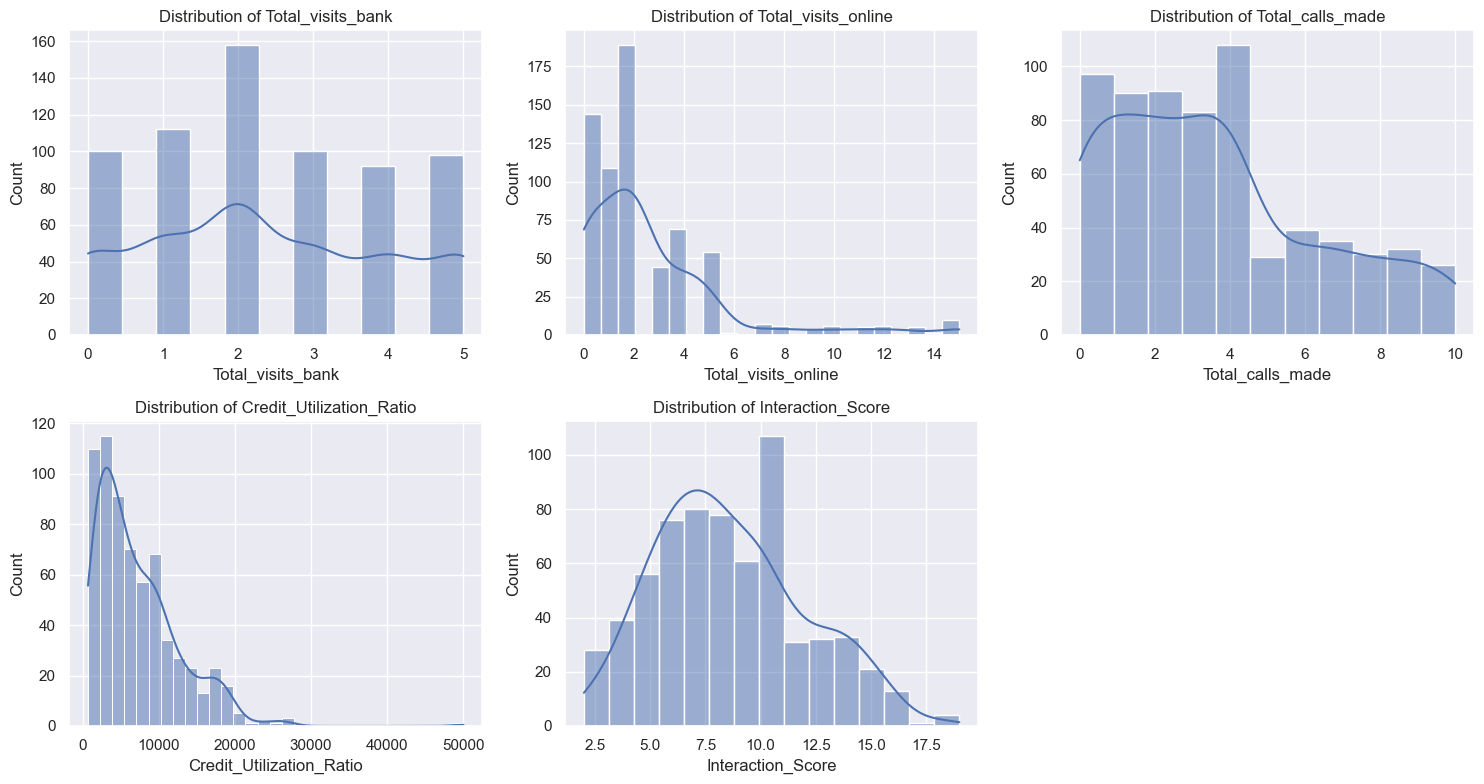

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Credit_Utilization_Ratio', 'Interaction_Score']

num_features = len(features)
num_cols = (num_features + 1) // 2

fig, axes = plt.subplots(2, num_cols, figsize=(5 * num_cols, 8))

axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

for ax in axes[num_features:]:
    fig.delaxes(ax)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


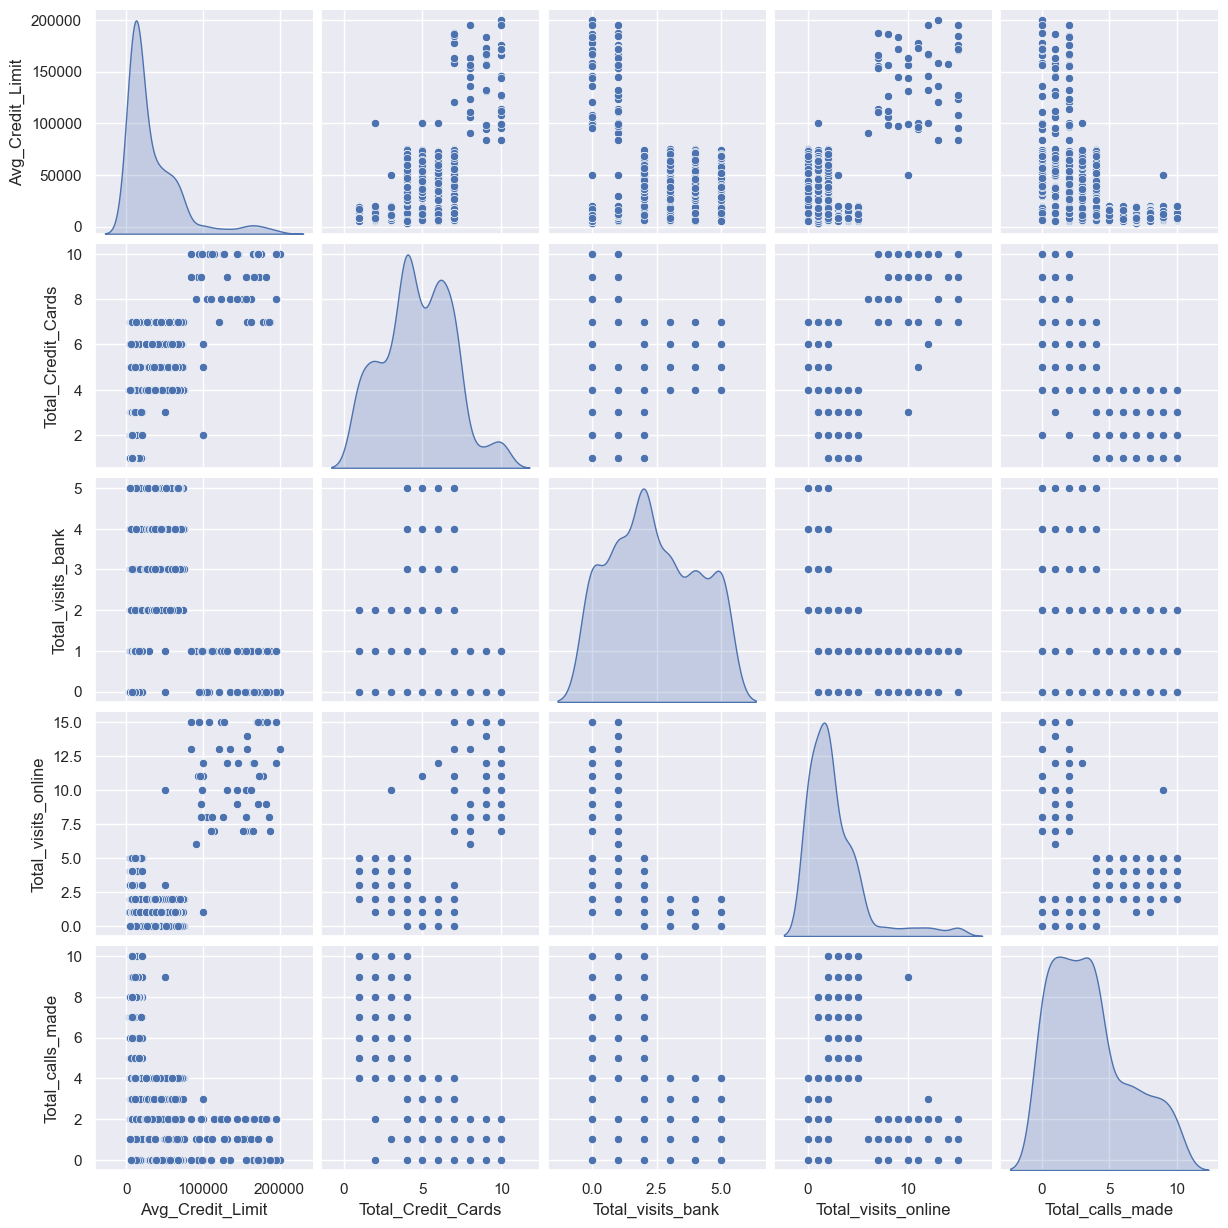

In [181]:
sns.pairplot(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde')

In [182]:
Corr = data.corr()

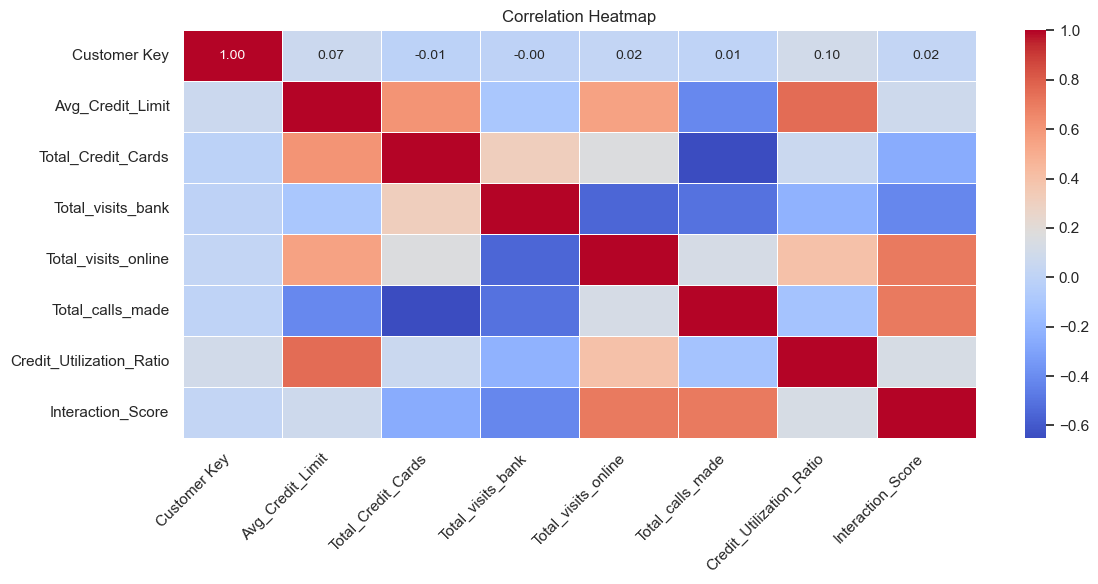

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with values displayed in the middle
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

# Set the title and adjust ticks
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Outliers Detection

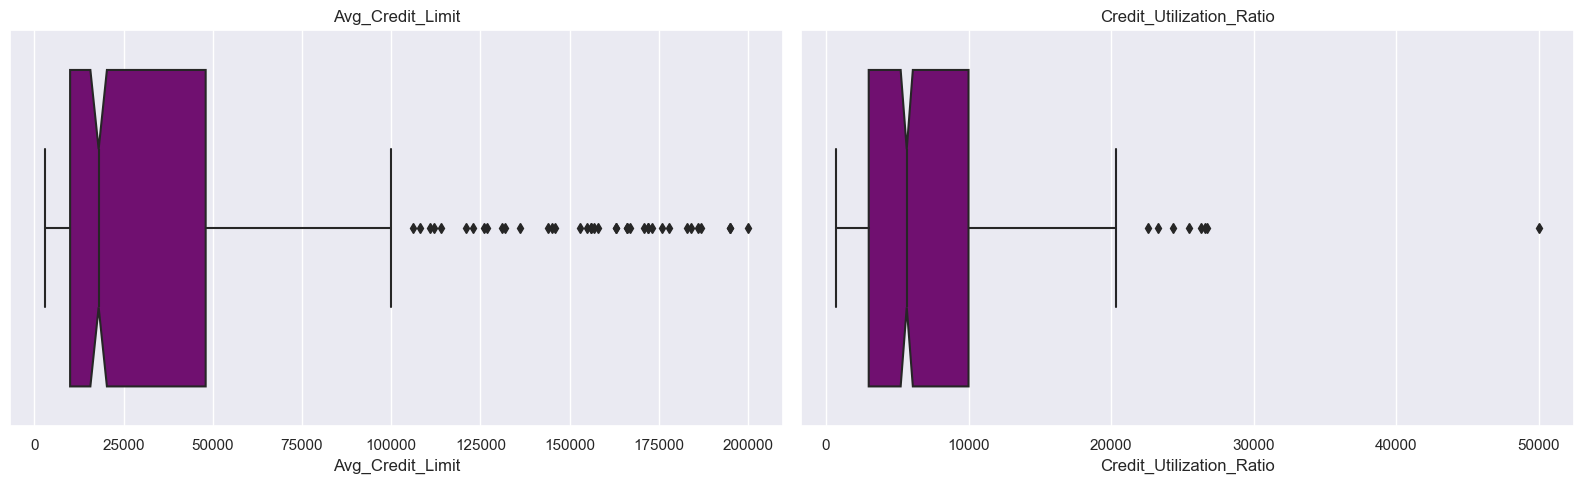

In [184]:
selected_columns = ['Avg_Credit_Limit','Credit_Utilization_Ratio']

color = "Purple"

notch = True

fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(16, 5))

for i, column in enumerate(selected_columns):
    sns.boxplot(x=data[column], ax=axes[i], color=color, notch=notch)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [185]:
# Calculate IQR
Q1 = data['Avg_Credit_Limit'].quantile(0.25)
Q3 = data['Avg_Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
IQR

38000.0

In [186]:
# Define Limits
lower_limit  = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit is: ' , lower_limit)
print('Upper limit is: ' , upper_limit)

lower limit is:  -47000.0
Upper limit is:  105000.0


In [187]:
outliers = data[(data['Avg_Credit_Limit'] < lower_limit) | (data['Avg_Credit_Limit'] > upper_limit)]

In [188]:
# Handle Outliers
data['Avg_Credit_Limit'] = np.where((data['Avg_Credit_Limit'] < lower_limit), lower_limit, data['Avg_Credit_Limit'])
data['Avg_Credit_Limit'] = np.where((data['Avg_Credit_Limit'] > upper_limit), upper_limit, data['Avg_Credit_Limit'])

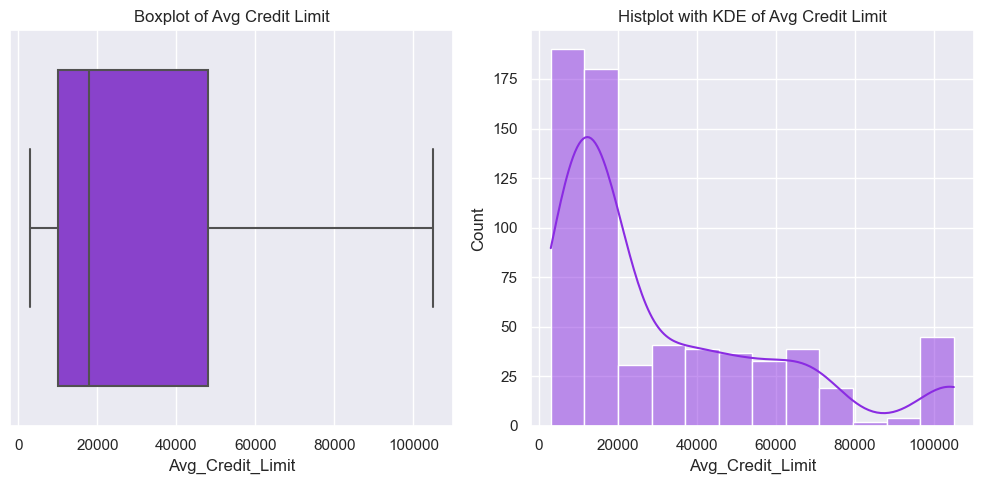

In [189]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

color = "#8A2BE2"

sns.boxplot(x=data["Avg_Credit_Limit"], ax=axes[0], color=color)
axes[0].set_title("Boxplot of Avg Credit Limit")

sns.histplot(x=data["Avg_Credit_Limit"], ax=axes[1], color=color, kde=True)
axes[1].set_title("Histplot with KDE of Avg Credit Limit")

plt.tight_layout()
plt.show()

### Scaling

In [190]:
scaler = MinMaxScaler()

In [191]:
data['Avg_Credit_Limit'] = scaler.fit_transform(data[['Avg_Credit_Limit']])
data['Credit_Utilization_Ratio'] = scaler.fit_transform(data[['Credit_Utilization_Ratio']])

In [192]:
agg_data = data.agg({'Avg_Credit_Limit': ['mean', 'min', 'max'], 'Credit_Utilization_Ratio': ['mean', 'min', 'max']})
agg_data

,Avg_Credit_Limit,Credit_Utilization_Ratio
mean,0.281046,0.131598
min,0.000000,0.000000
max,1.000000,1.000000


In [213]:
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
Sl_No,,,,,,,,
1,87073,0.950980,2,1,1,0,1.000000,2
2,38414,0.460784,3,0,10,9,0.323671,19
3,17341,0.460784,7,1,3,4,0.130435,8
4,40496,0.264706,5,1,1,4,0.107246,6
5,47437,0.950980,6,0,12,3,0.323671,15
...,...,...,...,...,...,...,...,...
656,51108,0.941176,10,1,10,0,0.186377,11
657,60732,0.794118,10,1,13,2,0.155942,16
658,53834,1.000000,8,1,9,1,0.353261,11


## K-Means

In [215]:
X = data.iloc[:,[1,6]]
X

,Avg_Credit_Limit,Credit_Utilization_Ratio
Sl_No,,
1,0.950980,1.000000
2,0.460784,0.323671
3,0.460784,0.130435
4,0.264706,0.107246
5,0.950980,0.323671
...,...,...
656,0.941176,0.186377
657,0.794118,0.155942
658,1.000000,0.353261


In [216]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

Cost_Function= 59.54274865285163 with 1 Clusters
Cost_Function= 16.62356359649408 with 2 Clusters
Cost_Function= 8.93810866058065 with 3 Clusters
Cost_Function= 5.820590878393672 with 4 Clusters
Cost_Function= 4.103177675077764 with 5 Clusters
Cost_Function= 3.328901010425862 with 6 Clusters
Cost_Function= 2.737999179247068 with 7 Clusters
Cost_Function= 2.298613775170445 with 8 Clusters
Cost_Function= 2.0012731425737544 with 9 Clusters
Cost_Function= 1.671380257219064 with 10 Clusters


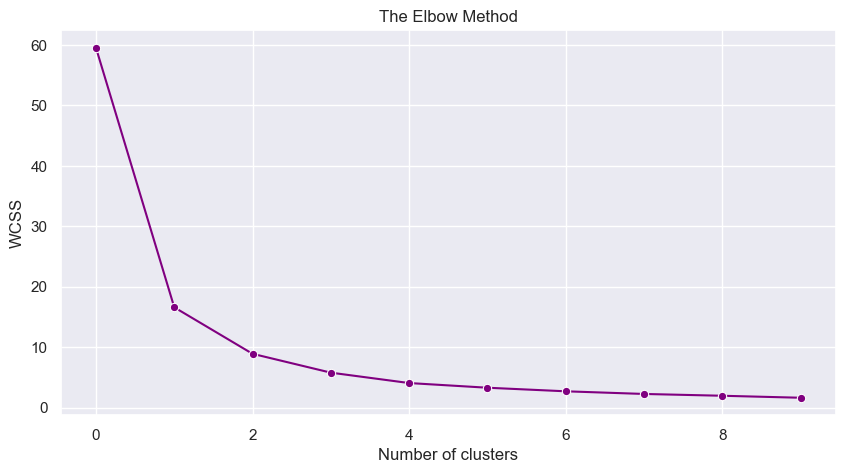

In [217]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [218]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [219]:
# Get the cluster labels
labels = kmeans.labels_

In [220]:
cccd_scaled['K_means'] = labels
cccd_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score,Total_interactions,Cluster,BDSCAN Cluster
Sl_No,,,,,,,,,,
1,2.398942,-1.249225,-0.860451,-0.547490,-1.251537,7.852911,-1.935936,-1.935936,2,-1
2,0.643619,-0.787585,-1.473731,2.520519,1.891859,1.736910,3.056296,3.056296,1,-1
3,0.643619,1.058973,-0.860451,0.134290,0.145528,-0.010519,-0.173972,-0.173972,1,0
4,-0.058511,0.135694,-0.860451,-0.547490,0.145528,-0.220210,-0.761293,-0.761293,0,1
5,2.398942,0.597334,-1.473731,3.202298,-0.203739,1.736910,1.881653,1.881653,2,-1


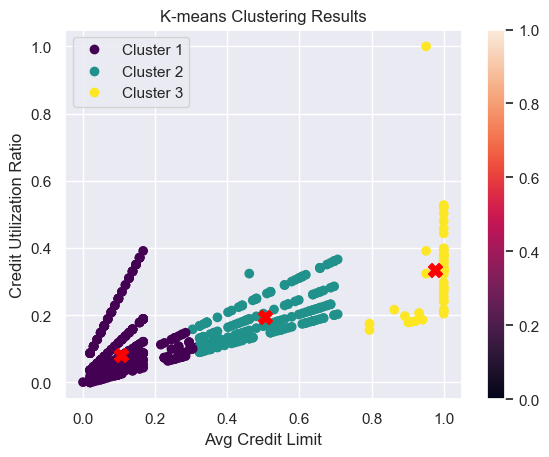

In [221]:
centroids = kmeans.cluster_centers_
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label='Centroids')

# Create custom legend labels for each cluster
legend_labels = [f'Cluster {i+1}' for i in range(3)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.title('K-means Clustering Results')
plt.colorbar()

## HC Cluster

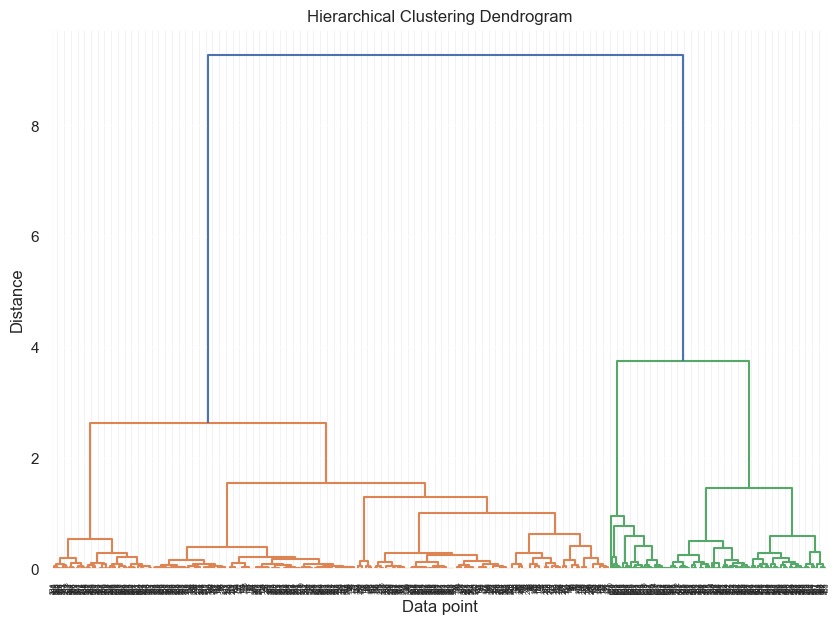

In [222]:
Z = linkage(X, 'ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [223]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [224]:
y_hc = hc.fit_predict(X)


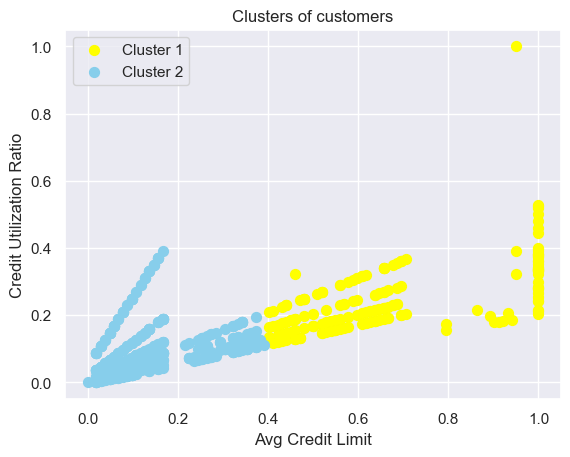

In [225]:
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'skyblue', label = 'Cluster 2')


plt.title('Clusters of customers')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.legend()
plt.show()

## DB Scan

In [226]:
def find_optimal_parameters(cccd_scaled, eps_range, min_samples_range):
    X = cccd_scaled.values

    best_score = -1
    best_eps = None
    best_min_samples = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters ignoring noise (-1)

            if num_clusters > 1:  # Calculate silhouette score only if there are multiple clusters
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

    return best_eps, best_min_samples


In [227]:
eps_range = [0.1, 0.5, 1.0]
min_samples_range = [2, 5, 10]

In [228]:
best_eps, best_min_samples = find_optimal_parameters(X, eps_range, min_samples_range)

print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)

Best epsilon: 0.1
Best min_samples: 5


In [229]:
dbscan = DBSCAN(eps=0.1, min_samples=5)

In [230]:
labels = dbscan.fit_predict(X)

In [231]:
cluster_labels = dbscan.labels_
cluster_labels

array([-1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [232]:
cccd_scaled['BDSCAN Cluster'] = cluster_labels
cccd_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score,Total_interactions,Cluster,BDSCAN Cluster
Sl_No,,,,,,,,,,
1,2.398942,-1.249225,-0.860451,-0.547490,-1.251537,7.852911,-1.935936,-1.935936,2,-1
2,0.643619,-0.787585,-1.473731,2.520519,1.891859,1.736910,3.056296,3.056296,1,0
3,0.643619,1.058973,-0.860451,0.134290,0.145528,-0.010519,-0.173972,-0.173972,1,0
4,-0.058511,0.135694,-0.860451,-0.547490,0.145528,-0.220210,-0.761293,-0.761293,0,0
5,2.398942,0.597334,-1.473731,3.202298,-0.203739,1.736910,1.881653,1.881653,2,1


In [233]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

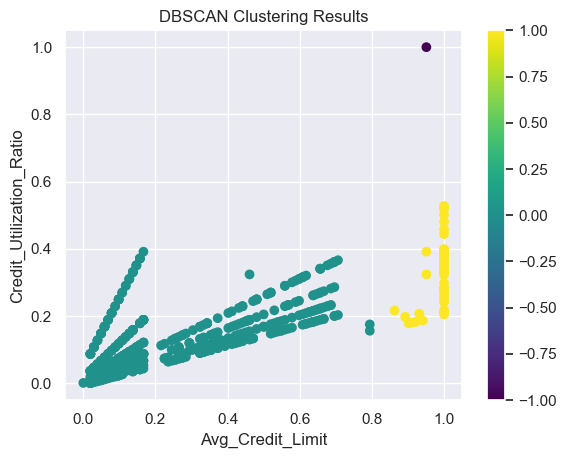

In [234]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Credit_Utilization_Ratio')
plt.title('DBSCAN Clustering Results')
plt.colorbar()
plt.show()

In [235]:
from sklearn.metrics import silhouette_score

In [247]:
sil_score = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.627203247852006


In [239]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X, y_hc, metric='euclidean')

print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.6663549648161222


## Results

1. Segment 0 has low credit limit and more number of total credit cards.

    -This maybe the indication that they have high credit usage and low income.

    -Segment 0 makes complaints by the medium of phone calls. 

    -The bank can arrange periodical feedback phone calls from Relationship Managers at the bank
    
    **They can be targeted for cross selling by the medium of phone calls**

2. Segment 1 makes 

    -less number of phone calls 

    -highest number of online visits

    -does not visit the bank at all

    -This maybe the indication that Segment 1 is literate and premium customers of the bank with higher income.

    **Luxury offers through emails and offers related to online shopping or coupons can be targeted to this segment**
    **They have the potential of being most profitable customers**


3. Segment 2 have almsot similar characterstics:
    
    -Median of 3 visits to the bank
    
    -Relatively higher visits to the bank
    
    -holds 4-6 Total Credit Cards
    
    **Both can targeted for cross selling through in bank managers and promotional advertisements in the bank**
    
    **Servicescape Promotions are Promotions done in the environment where the service is offered**